# Install required libraries

In [ ]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools import mask as coco_mask

In [ ]:
# Load the COCO annotations
with open('_annotations.coco.json') as f:
    coco_data = json.load(f)

coco_data

{'info': {'year': '2024',
  'version': '1',
  'description': 'Exported from roboflow.com',
  'contributor': '',
  'url': 'https://public.roboflow.com/object-detection/undefined',
  'date_created': '2024-10-06T07:33:44+00:00'},
 'licenses': [{'id': 1,
   'url': 'https://creativecommons.org/licenses/by/4.0/',
   'name': 'CC BY 4.0'}],
 'categories': [{'id': 0, 'name': 'butterfly', 'supercategory': 'none'},
  {'id': 1, 'name': 'butterfly', 'supercategory': 'butterfly'}],
 'images': [{'id': 0,
   'license': 1,
   'file_name': '0100115_png.rf.17f673982a4d8a98e834c070a4bfab61.jpg',
   'height': 640,
   'width': 640,
   'date_captured': '2024-10-06T07:33:44+00:00'},
  {'id': 1,
   'license': 1,
   'file_name': '0100119_png.rf.e69245c4191e7361d699159010e3b38c.jpg',
   'height': 640,
   'width': 640,
   'date_captured': '2024-10-06T07:33:44+00:00'},
  {'id': 2,
   'license': 1,
   'file_name': '0100120_png.rf.ccee3b1d017853cfd5d2e375c3405465.jpg',
   'height': 640,
   'width': 640,
   'date_cap

In [ ]:
# Example: Visualizing the first image and its mask
image_info = coco_data['images'][0]  # Get first image info
print(image_info)
image_path = f"{image_info['file_name']}"  # Image path
print(image_path)

{'id': 0, 'license': 1, 'file_name': '0100115_png.rf.17f673982a4d8a98e834c070a4bfab61.jpg', 'height': 640, 'width': 640, 'date_captured': '2024-10-06T07:33:44+00:00'}
0100115_png.rf.17f673982a4d8a98e834c070a4bfab61.jpg


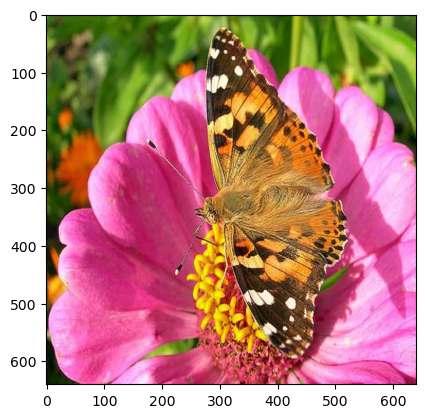

In [ ]:
image = cv2.imread(image_path)  # Load image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
plt.imshow(image)

In [ ]:
coco_data['annotations']

[{'id': 0,
  'image_id': 0,
  'category_id': 1,
  'bbox': [586, 0, 12.258, 26.207],
  'area': 321.246,
  'segmentation': [[589.419,
    0,
    586.323,
    4.138,
    586.323,
    26.207,
    597.677,
    19.31,
    598.581,
    0,
    589.419,
    0]],
  'iscrowd': 0},
 {'id': 1,
  'image_id': 0,
  'category_id': 1,
  'bbox': [497, 0, 48.798, 114.483],
  'area': 5586.49,
  'segmentation': [[497.267,
    0,
    521.29,
    88.276,
    519.226,
    107.586,
    522.323,
    114.483,
    529.548,
    111.724,
    531.613,
    103.448,
    540.903,
    100.69,
    544,
    104.828,
    546.065,
    100.69,
    545.032,
    91.034,
    540.903,
    88.276,
    539.871,
    55.172,
    534.71,
    34.483,
    526.452,
    12.414,
    516.317,
    0,
    497.267,
    0]],
  'iscrowd': 0},
 {'id': 2,
  'image_id': 0,
  'category_id': 1,
  'bbox': [169, 26, 358.707, 564.332],
  'area': 202429.89,
  'segmentation': [[253.945,
    306.807,
    271.376,
    327.662,
    261.285,
    344.838,
    

In [ ]:
annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_info['id']]  # Annotations for this image
annotations

[{'id': 0,
  'image_id': 0,
  'category_id': 1,
  'bbox': [586, 0, 12.258, 26.207],
  'area': 321.246,
  'segmentation': [[589.419,
    0,
    586.323,
    4.138,
    586.323,
    26.207,
    597.677,
    19.31,
    598.581,
    0,
    589.419,
    0]],
  'iscrowd': 0},
 {'id': 1,
  'image_id': 0,
  'category_id': 1,
  'bbox': [497, 0, 48.798, 114.483],
  'area': 5586.49,
  'segmentation': [[497.267,
    0,
    521.29,
    88.276,
    519.226,
    107.586,
    522.323,
    114.483,
    529.548,
    111.724,
    531.613,
    103.448,
    540.903,
    100.69,
    544,
    104.828,
    546.065,
    100.69,
    545.032,
    91.034,
    540.903,
    88.276,
    539.871,
    55.172,
    534.71,
    34.483,
    526.452,
    12.414,
    516.317,
    0,
    497.267,
    0]],
  'iscrowd': 0},
 {'id': 2,
  'image_id': 0,
  'category_id': 1,
  'bbox': [169, 26, 358.707, 564.332],
  'area': 202429.89,
  'segmentation': [[253.945,
    306.807,
    271.376,
    327.662,
    261.285,
    344.838,
    

In [ ]:
# Create a mask for the image
mask = np.zeros((image_info['height'], image_info['width']), dtype=np.uint8)
print(mask)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


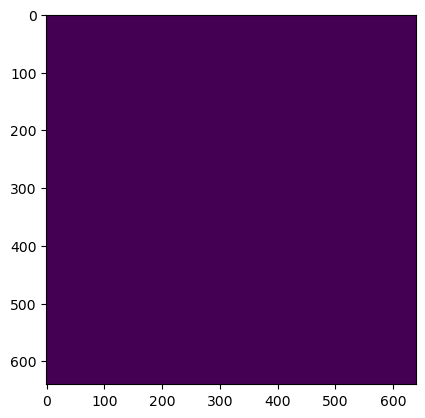

In [ ]:
plt.imshow(mask)

In [ ]:
# Function to create a binary mask for a single annotation
def create_binary_mask(segmentation, image_height, image_width):
    mask = np.zeros((image_height, image_width), dtype=np.uint8)

    for seg in segmentation:
        # Convert segmentation coordinates into a proper polygon
        poly = np.array(seg).reshape((len(seg) // 2, 2))
        # Create a binary mask from the polygon
        cv2.fillPoly(mask, [np.int32(poly)], 1)

    return mask

In [ ]:
for ann in annotations:
    binary_mask = create_binary_mask(ann['segmentation'], image_info['height'], image_info['width'])
    mask = np.maximum(mask, binary_mask)  # Merge masks

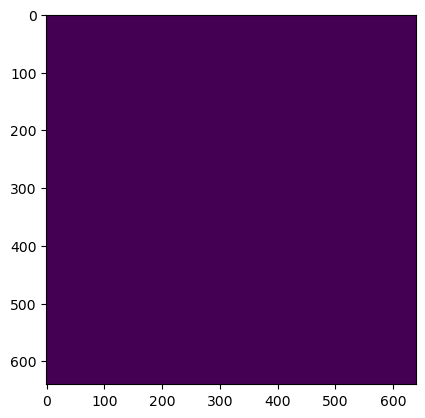

In [ ]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools import mask as coco_mask

# Load the COCO annotations
with open('_annotations.coco.json') as f:
    coco_data = json.load(f)

# Function to create a binary mask for a single annotation
def create_binary_mask(segmentation, image_height, image_width):
    mask = np.zeros((image_height, image_width), dtype=np.uint8)

    for seg in segmentation:
        # Convert segmentation coordinates into a proper polygon
        poly = np.array(seg).reshape((len(seg) // 2, 2))
        # Create a binary mask from the polygon
        cv2.fillPoly(mask, [np.int32(poly)], 1)

    return mask

# Example: Visualizing the first image and its mask
image_info = coco_data['images'][0]  # Get first image info
image_path = f"{image_info['file_name']}"  # Image path

image = cv2.imread(image_path)  # Load image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_info['id']]  # Annotations for this image

# Create a mask for the image
mask = np.zeros((image_info['height'], image_info['width']), dtype=np.uint8)
plt.imshow(mask)



In [ ]:
annotations

[{'id': 0,
  'image_id': 0,
  'category_id': 1,
  'bbox': [586, 0, 12.258, 26.207],
  'area': 321.246,
  'segmentation': [[589.419,
    0,
    586.323,
    4.138,
    586.323,
    26.207,
    597.677,
    19.31,
    598.581,
    0,
    589.419,
    0]],
  'iscrowd': 0},
 {'id': 1,
  'image_id': 0,
  'category_id': 1,
  'bbox': [497, 0, 48.798, 114.483],
  'area': 5586.49,
  'segmentation': [[497.267,
    0,
    521.29,
    88.276,
    519.226,
    107.586,
    522.323,
    114.483,
    529.548,
    111.724,
    531.613,
    103.448,
    540.903,
    100.69,
    544,
    104.828,
    546.065,
    100.69,
    545.032,
    91.034,
    540.903,
    88.276,
    539.871,
    55.172,
    534.71,
    34.483,
    526.452,
    12.414,
    516.317,
    0,
    497.267,
    0]],
  'iscrowd': 0},
 {'id': 2,
  'image_id': 0,
  'category_id': 1,
  'bbox': [169, 26, 358.707, 564.332],
  'area': 202429.89,
  'segmentation': [[253.945,
    306.807,
    271.376,
    327.662,
    261.285,
    344.838,
    

hi
AxesImage(shape=(640, 640))
hi
AxesImage(shape=(640, 640))
hi
AxesImage(shape=(640, 640))


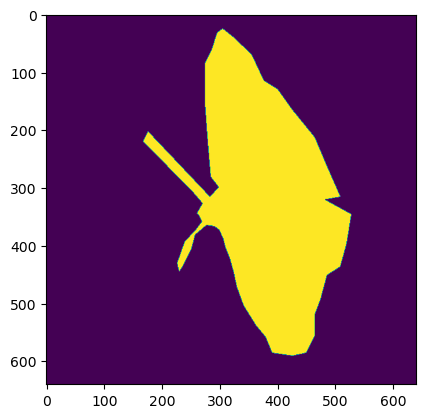

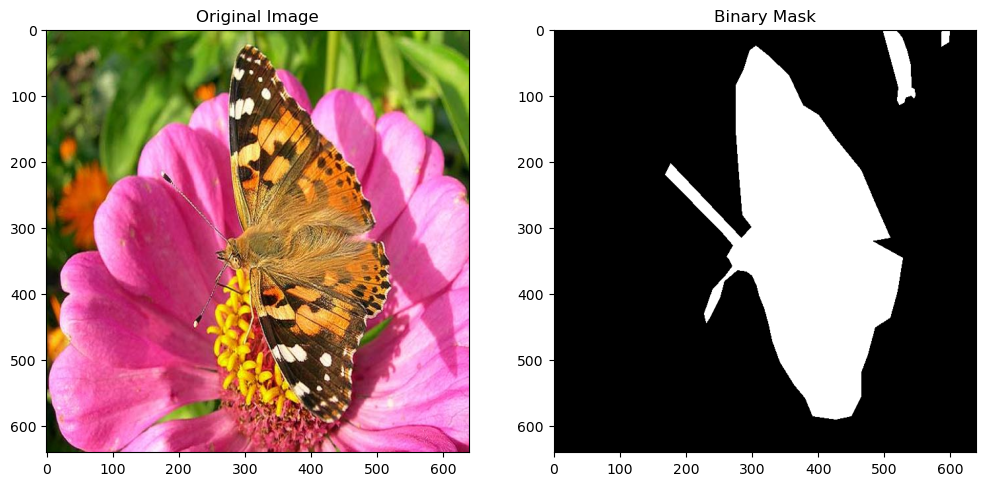

In [ ]:
for ann in annotations:
    print("hi")
    binary_mask = create_binary_mask(ann['segmentation'], image_info['height'], image_info['width'])
    print(plt.imshow(binary_mask))
    mask = np.maximum(mask, binary_mask)  # Merge masks

# Visualize the image and mask
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Binary Mask")

plt.show()

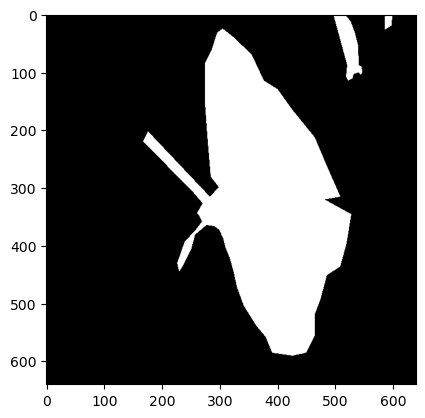

In [ ]:
plt.imshow(mask, cmap='gray')

In [ ]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
np.unique(mask)

array([0, 1], dtype=uint8)

In [ ]:
mask_save_path = f"{image_info['file_name'].split('.')[0]}_mask.png"
mask_save_path

'0100115_png_mask.png'

In [ ]:
cv2.imwrite(mask_save_path, mask)

True

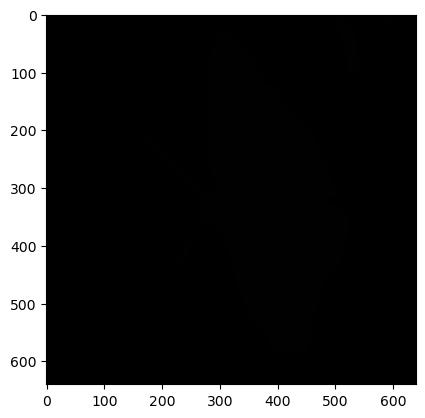

In [ ]:
plt.imshow(cv2.imread(mask_save_path))

In [ ]:
# Scale the mask to 0-255 for visibility
mask_scaled = mask * 255

cv2.imwrite("new_maksed_scaled.png", mask_scaled)

True

Text(0.5, 1.0, 'Binary Mask')

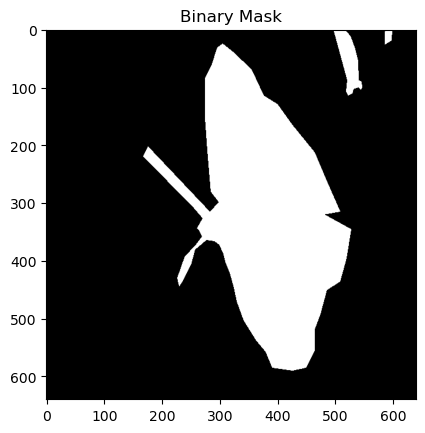

In [ ]:
# Now, visualize the saved mask
saved_mask = cv2.imread("new_maksed_scaled.png", cv2.IMREAD_GRAYSCALE)  # Load the saved mask
plt.imshow(saved_mask, cmap='gray')  # Use the 'gray' colormap to visualize the mask properly
plt.title("Binary Mask")

# Final full code

Mask saved successfully at ./0100120_png_mask.png


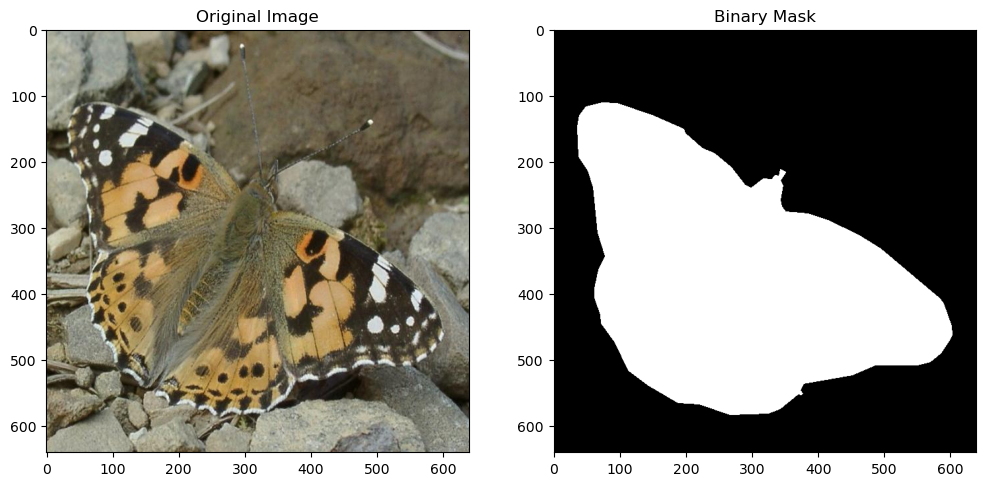

In [ ]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt

class COCOProcessor:
    def __init__(self, coco_annotation_file, image_dir):
        """
        Initialize the processor with the COCO annotations and image directory.
        :param coco_annotation_file: Path to the COCO annotation JSON file.
        :param image_dir: Directory where the images are stored.
        """
        self.coco_annotation_file = coco_annotation_file
        self.image_dir = image_dir
        self.coco_data = self._load_coco_annotations()

    def _load_coco_annotations(self):
        """ Load COCO annotations from the JSON file """
        try:
            with open(self.coco_annotation_file, 'r') as f:
                coco_data = json.load(f)
            return coco_data
        except FileNotFoundError:
            print(f"Error: COCO annotation file '{self.coco_annotation_file}' not found.")
            raise

    def create_binary_mask(self, segmentation, image_height, image_width):
        """
        Create a binary mask for the provided segmentation data.
        :param segmentation: List of segmentation polygons.
        :param image_height: Height of the image.
        :param image_width: Width of the image.
        :return: Binary mask.
        """
        mask = np.zeros((image_height, image_width), dtype=np.uint8)
        for seg in segmentation:
            # Convert segmentation coordinates into a proper polygon
            poly = np.array(seg).reshape((len(seg) // 2, 2))
            # Create a binary mask from the polygon
            cv2.fillPoly(mask, [np.int32(poly)], 1)
        return mask

    def save_mask(self, mask, image_info):
        """
        Save the binary mask to a file.
        :param mask: The binary mask to be saved.
        :param image_info: Image metadata from the COCO annotations.
        :return: The file path where the mask is saved.
        """
        # Scale the mask to 0-255 for visibility when saving
        mask_scaled = mask * 255

        # Generate file path for saving
        mask_save_path = f"{self.image_dir}/{image_info['file_name'].split('.')[0]}_mask.png"
        # Save the mask
        cv2.imwrite(mask_save_path, mask_scaled)
        print(f"Mask saved successfully at {mask_save_path}")
        return mask_save_path

    def process_image(self, image_id):
        """
        Process an image by generating and saving its binary mask.
        :param image_id: The ID of the image to be processed (from COCO data).
        :return: None
        """
        # Get image info by image_id
        image_info = self.coco_data['images'][image_id]
        image_path = f"{self.image_dir}/{image_info['file_name']}"

        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError(f"Image file {image_info['file_name']} not found in directory {self.image_dir}.")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

        # Get annotations for the image
        annotations = [ann for ann in self.coco_data['annotations'] if ann['image_id'] == image_info['id']]

        # Create the binary mask
        mask = np.zeros((image_info['height'], image_info['width']), dtype=np.uint8)
        for ann in annotations:
            binary_mask = self.create_binary_mask(ann['segmentation'], image_info['height'], image_info['width'])
            mask = np.maximum(mask, binary_mask)  # Merge all masks

        # Save the mask
        mask_save_path = self.save_mask(mask, image_info)

        # Visualize the original image and mask
        self.visualize(image, mask_save_path)

    def visualize(self, image, mask_save_path):
        """
        Visualize the original image and the corresponding binary mask.
        :param image: The original image (RGB format).
        :param mask_save_path: The file path of the saved mask.
        :return: None
        """
        # Load the saved mask
        saved_mask = cv2.imread(mask_save_path, cv2.IMREAD_GRAYSCALE)

        # Display the original image and the mask
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Original Image")

        plt.subplot(1, 2, 2)
        plt.imshow(saved_mask, cmap='gray')
        plt.title("Binary Mask")

        plt.show()

# Example Usage:
if __name__ == "__main__":
    coco_annotation_file = '_annotations.coco.json'
    image_dir = '.'

    # Create an instance of COCOProcessor
    processor = COCOProcessor(coco_annotation_file, image_dir)

    # Process the first image (image_id = 0)
    processor.process_image(2)
